# Báo Cáo Đồ Án Cuối Kì Môn Lập Trình Cho Khoa Học Dữ Liệu

##### Họ Và Tên : Đào Đức Anh
##### MSSV : 1711270

---

## Nội Dung
<br> Netflix Inc. là dịch vụ cung cấp nền tẳng truyền dữ liệu video theo yêu cầu trên toàn cầu và cho thuê DVD trả phí tại Hoa Kỳ, nơi DVD và đĩa Blu-ray được gửi thông qua thư điện tử bởi Permit Reply Mail.
<br> Với Netflix bạn có thể tận hưởng những bộ phim, show truyền hình đang sốt trên toàn thế giới ở bất kỳ đâu với chất lượng tốt nhất. Netflix cung cấp những nội dung giải phù hợp với mọi lứa tuổi, mọi đối tượng từ những nội dung phù hợp với trẻ em về gia đình,khám phá thế giới đến những thước phim hành động căng thẳng, kịch tính cùng những thể loại hình sự tội phạm hay những bộ phim tình cảm lãng mạng, ngoài ra còn rất nhiều thể loại khác với chất lượng không bàn cãi.
             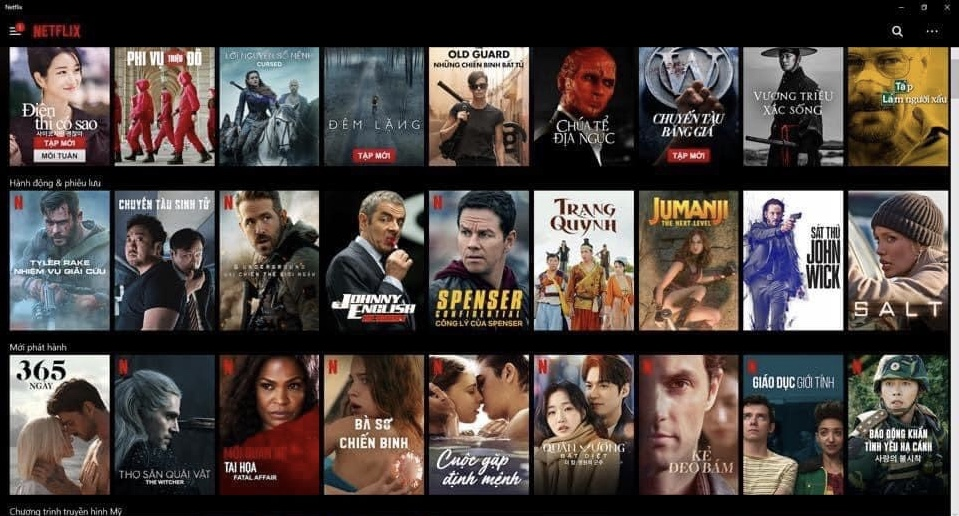


##### Notebook này sẽ phân tích tập dữ liệu [TV Shows and Movies listed on Netflix](https://www.kaggle.com/shivamb/netflix-shows) được đăng tải public bởi [Shivam Bansal](https://www.kaggle.com/shivamb) thông qua Kaggle- một cộng đồng trực tuyến rộng lớn cho các nhà khoa học dữ liệu- Tập dữ liệu bao gồm thông tin về những bộ phim, truyền hình thực tế đang được phát sóng trên netflix về các thông tin như tựa đề, đạo diễn, diễn viên, thời gian phát sóng, ... với mục đích cố gắng phân tích các dữ liệu được cung cấp để tìm ra được các thông tin như Đạo diễn, diễn viên nào đang được quan tâm chào đón; những thể loại phim khác nhau ở các quốc gia khác nhau; xu hướng xem phim hiện nay; ... với hy vọng có thể cung cấp những góc nhìn thú vị và bổ ích cho người xem, người làm phim, ...






**<br> License CC0:** Public Domain
<br> **Tag:** arts and entertainment,movies and tv show

---

## Tổng quan về dữ liệu


Dữ liệu được sử dụng trong projet này là dữ liệu về các bộ phim và show truyền hình được đăng tải và công chiếu trên nền tảng Netflix từ năm 2019. Dữ liệu được thu thập từ Flixable - search engine Netflix bên thứ ba và được public thông qua kaggle bởi  [Shivam Bansal](https://www.kaggle.com/shivamb).

### Đọc Dữ liệu 

In [38]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Thông tin về các cột trong tập dữ liệu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Tập dữ liệu này có 6234 dòng với 11 cột với thông tin của các cột như sau: 

|       Cột             | Mô tả                                                           |
|:----------------------|---------------------------------------------------------------- |
|    **show_id**        |   ID của mỗi tv show                                            |
|    **type**           |   Loại chương trình là tv show hay là phim                      | 
|    **title**          |   Tên của chương trình/phim                                     |
|    **director**       |   Tên của đạo diễn                                              | 
|    **cast**           |   Danh sách diễn viên                                           |
|    **country**        |   Đất nước nơi mà chương trình/phim được sản xuất               |
|    **date_added**     |   Ngày được public trên Netflix                                 |
|    **release_year**   |   Thời gian thực tế phát sóng của phim/Chương trình             |
|    **rating**         |   TV rating của chương trình/phim                               |
|    **duration**       |   Thời lượng theo phút hoặc số season của chương trình/phim     |
|    **listed_in**      |   Thể loại                                                      |
|    **description**    |   Mô tả tóm tắt nội dung chương trình                           |
| ================= | =============================================================== |

---

## Tiền Xử lý dữ liệu

### Thống kê các trường dữ liệu bị thiếu



In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

theo thông tin ở trên ta thấy được cột director có số lượng missing khá cao lên đến gần 2000 shows bị thiếu thông tin này, có 476 shows không có thông tin về nơi sản xuất, 11 dòng không có thời gian được đăng tải trên Netflix cụ thể và 10 shows không có thông tin về TV rating.

### Kiểm tra số dòng bị trùng

In [5]:
df.duplicated().sum()

0

$\implies $ Vậy không sự trùng lắp dữ liệu trong bảng dữ liệu này.

### Kiểm tra kiểu dữ liệu ở các cột

In [6]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Ta có thể thấy được đa số các cột đều là dạng object, show_id và release_year là kiểu int điều này là hợp lý, tuy nhiên đối với cột date_added có vẻ ta nên đổi thành kiểu dữ liệu datetime.

#### Danh sách diễn viên


Ở cột này là thông tin về diễn viên tham gia phim hay chương trình truyền hình đang xét, và được lưu dưới dạng ```str```, ta sẽ chuyển các ```str``` này thành dạng ```list``` để dễ dàng phân tích sau này

In [7]:
print("Số lượng danh sách diễn viên trong tập dữ liệu là :",df.cast.nunique())

Số lượng danh sách diễn viên trong tập dữ liệu là : 5469


In [8]:
# df.cast = df.cast.apply(lambda x: list(x.split(",")))
import itertools
a = df.cast.apply(lambda x : str(x).split(",")).values.tolist()
a = list(itertools.chain.from_iterable(a))
print("Tổng số diễn viên có mặt trên Netflix là : ",np.unique(a).shape[0])

Tổng số diễn viên có mặt trên Netflix là :  29379


#### date_added

In [9]:
df.date_added[:5]

0    September 9, 2019
1    September 9, 2016
2    September 8, 2018
3    September 8, 2018
4    September 8, 2017
Name: date_added, dtype: object

In [10]:
df.date_added = pd.to_datetime(df.date_added)

Ta sẽ thêm cột year_added chứa thông tin về năm mà shows được thêm vào Netflix để có thể phân tích so sánh với năm thực tế mà shows được sản xuất

In [19]:
df['year_added'] = df.date_added.dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duraion_min,seasons,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90,0,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94,0,2016.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",0,1,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,0,1,2018.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99,0,2017.0


#### Duration- thời lượng phát sóng 

In [12]:
df.duration.unique()

array(['90 min', '94 min', '1 Season', '99 min', '110 min', '60 min',
       '78 min', '95 min', '58 min', '62 min', '65 min', '61 min',
       '135 min', '98 min', '96 min', '79 min', '113 min', '80 min',
       '77 min', '112 min', '106 min', '102 min', '114 min', '125 min',
       '142 min', '133 min', '100 min', '86 min', '146 min', '10 min',
       '122 min', '126 min', '116 min', '130 min', '70 min', '128 min',
       '88 min', '108 min', '93 min', '64 min', '107 min', '92 min',
       '111 min', '103 min', '40 min', '85 min', '72 min', '45 min',
       '89 min', '24 min', '127 min', '163 min', '117 min', '42 min',
       '104 min', '75 min', '82 min', '38 min', '97 min', '81 min',
       '91 min', '152 min', '87 min', '121 min', '101 min', '119 min',
       '83 min', '182 min', '124 min', '63 min', '139 min', '171 min',
       '84 min', '69 min', '76 min', '41 min', '153 min', '141 min',
       '52 min', '137 min', '132 min', '157 min', '109 min', '105 min',
       '25 min', '71

<br> Cột này chứa thông tin về thời lượng của shows theo số phút nếu là tập lẻ hoặc trả về số season nếu là shows nhiều mùa.

<br> Ta sẽ thêm vào tập dữ liệu 2 cột dữ liệu mới là duration_mins và season. 2 cột này sẽ mang thông tin về số lượng thời gian theo phút của 1 show tập lẻ hoặc 0 nếu là shows nhiều mùa và cột seasons là thông tin về số lượng season hoặc 0 nếu là shows tập lẻ

In [13]:
df['duraion_min'] = df.duration.apply(lambda x: 0 if x[-3:] != 'min' else int(x[:-3]))
df['seasons'] = df.duration.apply(lambda x: 0 if x.find('Season')==-1 else int(x.split()[0]))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duraion_min,seasons
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90,0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94,0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99,0


### Khoảng giá trị của các cột

In [14]:
df.describe(include='all',datetime_is_numeric=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duraion_min,seasons
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234,6234.000000,6234.000000
unique,NaN,2,6172,3301,5469,554,NaN,NaN,14,201,461,6226,NaN,NaN
top,NaN,Movie,Limitless,"Raúl Campos, Jan Suter",David Attenborough,United States,NaN,NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,NaN,NaN
freq,NaN,4265,3,18,18,2032,NaN,NaN,2027,1321,299,3,NaN,NaN
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,2018-07-01 15:36:42.346158592,2013.35932,NaN,NaN,NaN,NaN,67.799968,0.562079
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.00000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,2017-10-01 00:00:00,2013.00000,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,2018-09-30 00:00:00,2016.00000,NaN,NaN,NaN,NaN,87.000000,0.000000
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,2019-06-08 00:00:00,2018.00000,NaN,NaN,NaN,NaN,105.000000,1.000000
max,8.123573e+07,NaN,NaN,NaN,NaN,NaN,2020-01-18 00:00:00,2020.00000,NaN,NaN,NaN,NaN,312.000000,15.000000


---

## Các Câu hỏi được đặt ra để giải quyết ở đây :D

####  1. Netflix phát triển mạnh mẽ như thế nào?

Ta sẽ phân tích số lượng conttents đã được thêm vào Netflix trong tập dữ liệu này quan sát sự phát triển của Netflix


In [27]:
year_data = df['year_added'].value_counts().sort_index()[:2019]
type_data = df.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

year_added,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
type,,,,,,,,,,,,,
Movie,1.0,2.0,1.0,13.0,4.0,6.0,19.0,58.0,264.0,913.0,1290.0,1546.0,147.0
TV Show,1.0,NaN,NaN,NaN,3.0,6.0,6.0,32.0,192.0,387.0,492.0,803.0,37.0


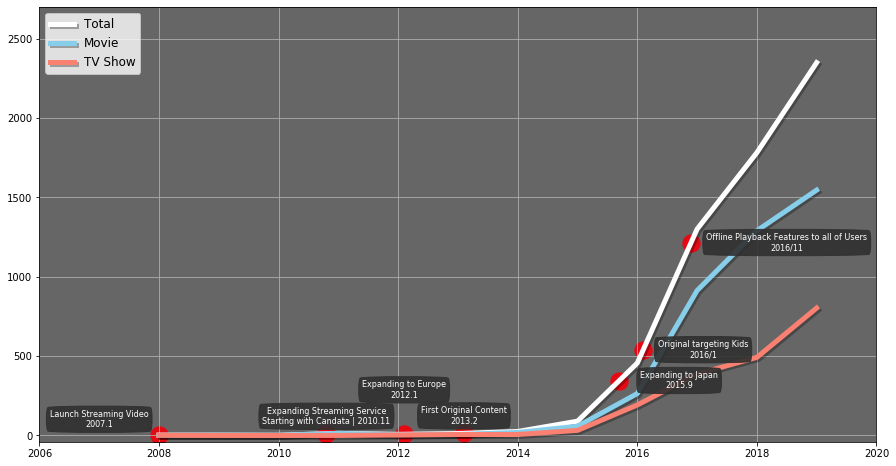

In [60]:
import matplotlib.patheffects as path_effects
year_data = df['year_added'].value_counts().sort_index().loc[:2019]
type_data = df.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=8,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
plt.legend(loc='upper left', fontsize=12)
plt.grid();


#### 2. Quốc gia nào đóng góp nhiều nội dung nhất?


## Trả lời các câu hỏi ở đây 

##  Kết luận ở đây

##  chào tạm bietj khán giả :D <4